### Student Information
Name: 許紘齊

Student ID: 11114020

GitHub ID: Damian-Hsu [(api/id: 102812213)](https://api.github.com/users/Damian-Hsu)

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

## Setup environment

### check environment

In [1]:
%load_ext autoreload
%autoreload 2
import sys
print(sys.executable) # c:\<your path to the project directory>\.venv\Scripts\python.exe
print(sys.version) #3.11.0

d:\DataMiningLab\DM2025-Lab1-Exercise\.venv\Scripts\python.exe
3.11.0 | packaged by Anaconda, Inc. | (main, Mar  1 2023, 18:18:21) [MSC v.1916 64 bit (AMD64)]


### Import

In [2]:
import pandas as pd
import numpy as np
import nltk
from sklearn.feature_extraction.text import CountVectorizer
import plotly.express as px
import matplotlib.pyplot as plt
import math
import os
import shutil
import seaborn as sns

DATA_DIR = "./.datas"
DATASET_FOLDER_NAME = "datasets"
TARGET_DATASET_NAME = "Reddit-stock-sentiment.csv"
TA_DATASET_PATH = "./newdataset/Reddit-stock-sentiment.csv"
TARGET_DATASET_PATH = os.path.join(DATA_DIR,DATASET_FOLDER_NAME,TARGET_DATASET_NAME)

os.makedirs(DATA_DIR, exist_ok=True)
shutil.copyfile(TA_DATASET_PATH, TARGET_DATASET_PATH)   
RANDOM_SEED = 42

%matplotlib inline

### nlte setup

In [3]:
nltk_download_dir = os.path.join(DATA_DIR,"nltk_data")
os.makedirs(nltk_download_dir, exist_ok=True)

nltk.download("punkt",download_dir = nltk_download_dir)
nltk.download("punkt_tab",download_dir = nltk_download_dir)
nltk.data.path.append(nltk_download_dir) # My usual usage

[nltk_data] Downloading package punkt to ./.datas\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to ./.datas\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


### Data Preparation
- create DataFrame

In [4]:
df_Reddit = pd.read_csv(TARGET_DATASET_PATH)
df_Reddit.head(3)

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,NaN,NaN,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president maki...,Btankersly66,https://apnews.com/article/trump-truth-social-...,1,NaN,NaN,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0


In [5]:
# Select sentiment as label
df_Reddit = df_Reddit.drop('label', axis=1)
df_Reddit.columns

Index(['type', 'datetime', 'post_id', 'subreddit', 'title', 'author', 'url',
       'upvotes', 'downvotes', 'upvote_ratio', 'text', 'subjectivity',
       'polarity', 'sentiment', 'entities'],
      dtype='object')

In [6]:
# new order of columns
new_order = ['type', 'datetime', 'post_id', 'subreddit', 'title', 'author', 'url',
       'upvotes', 'downvotes', 'upvote_ratio', 'text', 'subjectivity',
       'polarity', 'entities', 'sentiment']
df_Reddit = df_Reddit[new_order]
df_Reddit.head(3)

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,entities,sentiment
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,NaN,NaN,Calls on retards,1.000000,-0.900000,[],-1.0
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,"['Stunt', 'company', 'deal', 'place']",1.0
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president maki...,Btankersly66,https://apnews.com/article/trump-truth-social-...,1,NaN,NaN,Seeing lots of red in the ticker.,0.000000,0.000000,['ticker'],0.0


## 

## Basic information of data

In [7]:
print("\n===== Data shape: ===== \n", df_Reddit.shape) 
print("\n===== Data columns: ===== \n", df_Reddit.columns)
print("\n===== Data types: ===== \n", df_Reddit.dtypes)
# 計算數值型資料的基本統計資訊
print("\n===== Data description: ===== \n", df_Reddit.describe())


===== Data shape: ===== 
 (847, 15)

===== Data columns: ===== 
 Index(['type', 'datetime', 'post_id', 'subreddit', 'title', 'author', 'url',
       'upvotes', 'downvotes', 'upvote_ratio', 'text', 'subjectivity',
       'polarity', 'entities', 'sentiment'],
      dtype='object')

===== Data types: ===== 
 type             object
datetime         object
post_id          object
subreddit        object
title            object
author           object
url              object
upvotes           int64
downvotes       float64
upvote_ratio    float64
text             object
subjectivity    float64
polarity        float64
entities         object
sentiment       float64
dtype: object

===== Data description: ===== 
            upvotes  downvotes  upvote_ratio  subjectivity    polarity  \
count   847.000000  64.000000     64.000000    847.000000  847.000000   
mean     12.262102   0.265625      0.981406      0.346768    0.036116   
std     142.126337   1.461052      0.068147      0.317261    0.297

### 發現問題
- 在 upvotes 中的最小值是 -74，upvotes是記數型資料，應該要從0開始
- 總筆數為 847 ， downvotes 與 upvote_ratio 卻只有 64 筆資料(後續Miss Value Cenversion處理)
### 處理方式
- 將負數資料轉為 0 


In [8]:
df_Reddit['upvotes'] = df_Reddit['upvotes'].clip(lower=0)
df_Reddit['downvotes'] = df_Reddit['downvotes'].clip(lower=0)
df_Reddit.describe()


,upvotes,downvotes,upvote_ratio,subjectivity,polarity,sentiment
count,847.000000,64.000000,64.000000,847.000000,847.000000,847.000000
mean,12.495868,0.265625,0.981406,0.346768,0.036116,0.144038
std,142.076070,1.461052,0.068147,0.317261,0.297814,0.767566
min,0.000000,0.000000,0.500000,0.000000,-1.000000,-1.000000
25%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.366667,0.000000,0.000000
75%,4.000000,0.000000,1.000000,0.577500,0.150000,1.000000
max,3943.000000,11.000000,1.000000,1.000000,1.000000,1.000000


## Data Transformation

### Missing Value Cenversion

In [9]:
# check normal missing values
df_Reddit.isnull().sum()

type              0
datetime          0
post_id           0
subreddit         0
title             0
author            0
url               0
upvotes           0
downvotes       783
upvote_ratio    783
text              0
subjectivity      0
polarity          0
entities          0
sentiment         0
dtype: int64

In [10]:
# check hide miss values
_missing_values = ['NaN', 'None', '', ' ', 'na', 'n.a.', 'N.A.', 'nan', 'NAN', 'null', 'NULL', 'Null', '-', '--', '---', '----',[], {}, '[]', '{}']
def check_missing_values_str(x):
    if pd.isna(x) or x in _missing_values:
        return True
    else:
        return False
    
for col in df_Reddit.columns:
    missing_count = df_Reddit[col].apply(check_missing_values_str).sum()
    if missing_count > 0:
        print(f"Column '{col}' has {missing_count} missing values.")
        
# Column 'downvotes' has 783 missing values.
# Column 'upvote_ratio' has 783 missing values.
# Column 'entities' has 53 missing values.

Column 'downvotes' has 783 missing values.
Column 'upvote_ratio' has 783 missing values.
Column 'entities' has 53 missing values.


In [11]:
show = df_Reddit[df_Reddit["downvotes"].notna()]
print(show[["upvotes","downvotes","upvote_ratio"]].info())
print(show[show["upvotes"]/(show["upvotes"]+show["downvotes"])\
            == show["upvote_ratio"]]\
            [["upvotes","downvotes","upvote_ratio"]].info())


#  #   Column        Non-Null Count  Dtype  
# ---  ------        --------------  -----  
#  0   upvotes       64 non-null     int64  
#  1   downvotes     64 non-null     float64
#  2   upvote_ratio  64 non-null     float64

#  #   Column        Non-Null Count  Dtype  
# ---  ------        --------------  -----  
#  0   upvotes       53 non-null     int64  
#  1   downvotes     53 non-null     float64
#  2   upvote_ratio  53 non-null     float64

# 明顯發現 upvote_ratio 計算有問題，因此需要重新計算upvote_ratio

<class 'pandas.core.frame.DataFrame'>
Index: 64 entries, 3 to 844
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   upvotes       64 non-null     int64  
 1   downvotes     64 non-null     float64
 2   upvote_ratio  64 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 2.0 KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 53 entries, 48 to 844
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   upvotes       53 non-null     int64  
 1   downvotes     53 non-null     float64
 2   upvote_ratio  53 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 1.7 KB
None


In [12]:
def upvote_ratio(row):
    if row["upvotes"] + row["downvotes"] == 0:
        return 0
    elif pd.notna(row["downvotes"]):
        return row["upvotes"]/(row["upvotes"]+row["downvotes"])
    else:
        return np.nan
df_Reddit["upvote_ratio"] = df_Reddit.apply(upvote_ratio, axis=1)
df_Reddit["upvote_ratio"]

0      NaN
1      NaN
2      NaN
3      1.0
4      NaN
      ... 
842    NaN
843    NaN
844    1.0
845    NaN
846    NaN
Name: upvote_ratio, Length: 847, dtype: float64

In [13]:
# 將 entities 欄位的 [] 填補為 np.nan(後面發現不需要)
# df_Reddit['entities'] = df_Reddit['entities'].apply(lambda x: np.nan if check_missing_values_str(x) else x)
# 將 downvotes 與 upvote_ratio 欄位直接刪除，因為這兩個欄位有太多missing values
# 後續可以用T檢定測試相關性，或者做有無欄位的實驗
df_Reddit = df_Reddit.drop(['downvotes','upvote_ratio'], axis=1)
df_Reddit.head(3)

,type,datetime,post_id,subreddit,title,author,url,upvotes,text,subjectivity,polarity,entities,sentiment
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,Calls on retards,1.000000,-0.900000,[],-1.0
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,0,Stunt as in like why did they even make a big ...,0.177778,0.083333,"['Stunt', 'company', 'deal', 'place']",1.0
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president maki...,Btankersly66,https://apnews.com/article/trump-truth-social-...,1,Seeing lots of red in the ticker.,0.000000,0.000000,['ticker'],0.0


### Type Conversion

In [14]:
df_Reddit.head(1)

,type,datetime,post_id,subreddit,title,author,url,upvotes,text,subjectivity,polarity,entities,sentiment
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,Calls on retards,1.0,-0.9,[],-1.0


In [15]:
df_Reddit.info()
# Data columns (total 13 columns):
#  #   Column        Non-Null Count  Dtype  
# ---  ------        --------------  -----  
#  0   type          847 non-null    object => category
#  1   datetime      847 non-null    object => datetime
#  2   post_id       847 non-null    object 
#  3   subreddit     847 non-null    object => category
#  4   title         847 non-null    object 
#  5   author        847 non-null    object 
#  6   url           847 non-null    object 
#  7   upvotes       847 non-null    int64  
#  8   text          847 non-null    object 
#  9   subjectivity  847 non-null    float64
#  10  polarity      847 non-null    float64
#  11  entities      794 non-null    object => list
#  12  sentiment     847 non-null    float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847 entries, 0 to 846
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   type          847 non-null    object 
 1   datetime      847 non-null    object 
 2   post_id       847 non-null    object 
 3   subreddit     847 non-null    object 
 4   title         847 non-null    object 
 5   author        847 non-null    object 
 6   url           847 non-null    object 
 7   upvotes       847 non-null    int64  
 8   text          847 non-null    object 
 9   subjectivity  847 non-null    float64
 10  polarity      847 non-null    float64
 11  entities      847 non-null    object 
 12  sentiment     847 non-null    float64
dtypes: float64(3), int64(1), object(9)
memory usage: 86.1+ KB


In [16]:
# Convert 'datetime' column to datetime type
df_Reddit['datetime'] = pd.to_datetime(df_Reddit['datetime'])
# convert 'entities' column to list type
df_Reddit['entities'] = df_Reddit['entities'].apply(lambda x: eval(x) if pd.notna(x) else x)
# convert 'type' column to category type
df_Reddit['type'] = df_Reddit['type'].astype('category')
# convert 'subreddit' column to category type
df_Reddit['subreddit'] = df_Reddit['subreddit'].astype('category')

df_Reddit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847 entries, 0 to 846
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   type          847 non-null    category      
 1   datetime      847 non-null    datetime64[ns]
 2   post_id       847 non-null    object        
 3   subreddit     847 non-null    category      
 4   title         847 non-null    object        
 5   author        847 non-null    object        
 6   url           847 non-null    object        
 7   upvotes       847 non-null    int64         
 8   text          847 non-null    object        
 9   subjectivity  847 non-null    float64       
 10  polarity      847 non-null    float64       
 11  entities      847 non-null    object        
 12  sentiment     847 non-null    float64       
dtypes: category(2), datetime64[ns](1), float64(3), int64(1), object(6)
memory usage: 74.9+ KB


## Dealing with Duplicate Data

In [17]:
check_columns = [ 'datetime', 'post_id', 'title', 'author', 'url','text']
for col in check_columns:
    print(f"Column '{col}' has {df_Reddit[col].duplicated().sum()} duplicated values.")


Column 'datetime' has 5 duplicated values.
Column 'post_id' has 0 duplicated values.
Column 'title' has 720 duplicated values.
Column 'author' has 116 duplicated values.
Column 'url' has 696 duplicated values.
Column 'text' has 23 duplicated values.


In [18]:
# 檢查全資料重複
df_Reddit.duplicated(subset=check_columns).sum()

np.int64(0)

In [19]:
df_Reddit.duplicated(subset=['title','text','author']).sum()

np.int64(23)

In [20]:
# 刪除'title','text'重複的資料
df_Reddit = df_Reddit.drop_duplicates(subset=['title','text','author'])

In [21]:
# 檢查類別比例
categorical_columns = ['type', 'subreddit', 'author']
for col in categorical_columns:
    print(f"Column '{col}' value counts:\n{df_Reddit[col].value_counts()}\n")

Column 'type' value counts:
type
comment    782
post        42
Name: count, dtype: int64

Column 'subreddit' value counts:
subreddit
stocks              273
StockMarket         250
stockstobuytoday    152
wallstreetbets      149
Name: count, dtype: int64

Column 'author' value counts:
author
saasfin                41
[deleted]              13
AutoModerator           9
bullrfuk                5
MutaliskGluon           3
                       ..
le_mihai                1
Ordinary-Office9180     1
lulububudu              1
yes_ur_wrong            1
Odd-Temperature-791     1
Name: count, Length: 731, dtype: int64



In [22]:
# 檢查同標題是否同URL
title_url_counts = df_Reddit.groupby('title')['url'].nunique()
duplicate_title_url = title_url_counts[title_url_counts > 1]
duplicate_title_url.sum()
# 有36個標題對應多個URL，其他的標題都是一對一對應，因此可以刪除URL欄位(與標題相關性太高)

np.int64(4)

In [23]:
# 刪掉URL欄位
df_Reddit = df_Reddit.drop(['url'], axis=1)

In [24]:
df_Reddit.info()

<class 'pandas.core.frame.DataFrame'>
Index: 824 entries, 0 to 846
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   type          824 non-null    category      
 1   datetime      824 non-null    datetime64[ns]
 2   post_id       824 non-null    object        
 3   subreddit     824 non-null    category      
 4   title         824 non-null    object        
 5   author        824 non-null    object        
 6   upvotes       824 non-null    int64         
 7   text          824 non-null    object        
 8   subjectivity  824 non-null    float64       
 9   polarity      824 non-null    float64       
 10  entities      824 non-null    object        
 11  sentiment     824 non-null    float64       
dtypes: category(2), datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 72.7+ KB


## Visualize current data

### category column

In [25]:
def _hundreds(num : int) -> int:
    drift = 2 if num % 100 > 80 else 1
    return (num // 100 + drift ) * 100

type
comment    782
post        42
Name: count, dtype: int64


<Axes: title={'center': 'type distribution'}, xlabel='type'>

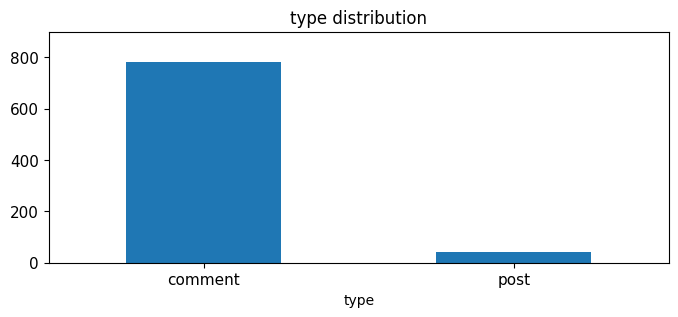

In [26]:
target_column = "type"
print(df_Reddit[target_column].value_counts())

# plot barchart for X
df_Reddit[target_column].value_counts().plot(kind = 'bar',
                                    title=f'{target_column} distribution',
                                    ylim = [0,_hundreds(max(df_Reddit[target_column].value_counts()))],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

subreddit
stocks              273
StockMarket         250
stockstobuytoday    152
wallstreetbets      149
Name: count, dtype: int64


<Axes: title={'center': 'subreddit distribution'}, xlabel='subreddit'>

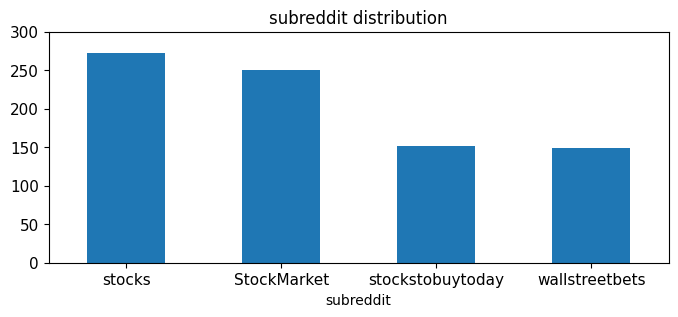

In [27]:
target_column = "subreddit"
print(df_Reddit[target_column].value_counts())

# plot barchart for X
df_Reddit[target_column].value_counts().plot(kind = 'bar',
                                    title=f'{target_column} distribution',
                                    ylim = [0,_hundreds(max(df_Reddit[target_column].value_counts()))],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

subreddit
StockMarket         0.096000
stocks              0.098901
stockstobuytoday    0.256579
wallstreetbets      0.201342
Name: sentiment, dtype: float64


C:\Users\imyud\AppData\Local\Temp\ipykernel_36688\1531230795.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  proportion = df_Reddit.groupby(target_column)['sentiment'].mean()


<Axes: title={'center': 'subreddit vs sentiment mean'}, xlabel='subreddit', ylabel='sentiment mean'>

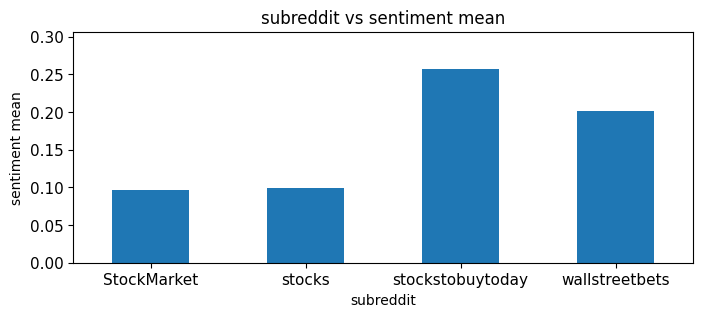

In [28]:
# 視覺化 subreddit 類別對應 sentiment 的平均
target_column = "subreddit"
proportion = df_Reddit.groupby(target_column)['sentiment'].mean()
print(proportion)
proportion.plot(kind = 'bar',
                title=f'{target_column} vs sentiment mean',
                ylim = [0,proportion.max()+0.05],
                ylabel='sentiment mean',        
                rot = 0, fontsize = 11, figsize = (8,3))

type
comment    0.132992
post       0.380952
Name: sentiment, dtype: float64


C:\Users\imyud\AppData\Local\Temp\ipykernel_36688\2377317311.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  proportion = df_Reddit.groupby(target_column)['sentiment'].mean()


<Axes: title={'center': 'type vs sentiment mean'}, xlabel='type', ylabel='sentiment mean'>

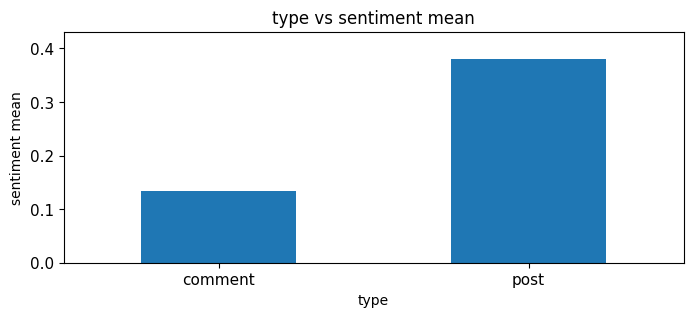

In [29]:
# 視覺化 type 類別對應 sentiment 的平均
target_column = "type"
proportion = df_Reddit.groupby(target_column)['sentiment'].mean()
print(proportion)
proportion.plot(kind = 'bar',
                title=f'{target_column} vs sentiment mean',
                ylim = [0,proportion.max()+0.05],
                ylabel='sentiment mean',        
                rot = 0, fontsize = 11, figsize = (8,3))

## Feature Creation

### NLP

In [30]:
# from helpers 
def tokenize_text(text, remove_stopwords=False):
    """
    Tokenize text using the nltk library
    """
    tokens = []
    for d in nltk.sent_tokenize(text, language='english'):
        for word in nltk.word_tokenize(d, language='english'):
            # filters here
            tokens.append(word)
    return tokens


In [31]:
df_Reddit["unigrams"] = df_Reddit["text"].apply(lambda x: tokenize_text(x, remove_stopwords=False))
df_Reddit["unigrams"].head(3)

0                                 [Calls, on, retards]
1    [Stunt, as, in, like, why, did, they, even, ma...
2          [Seeing, lots, of, red, in, the, ticker, .]
Name: unigrams, dtype: object

In [32]:
count_vect = CountVectorizer()
counts_Reddit = count_vect.fit_transform(df_Reddit['text'])
print(counts_Reddit[0])
counts_Reddit.shape

  (np.int32(0), np.int32(692))	1
  (np.int32(0), np.int32(2706))	1
  (np.int32(0), np.int32(3248))	1


(824, 4346)

In [33]:
counts_Reddit[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

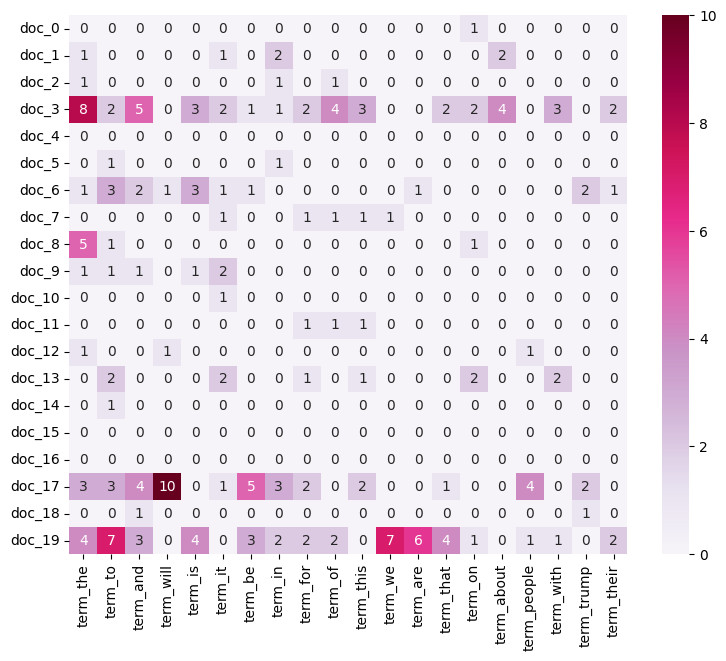

In [34]:
# create a 0:20 vacabulary dictionary
X_sub = counts_Reddit[0:20, :]

# get all feature names
feature_names = count_vect.get_feature_names_out()

# count frequency of each word in the sub-matrix
word_freq = np.asarray(X_sub.sum(axis=0)).squeeze() # can use .ravel() also on here

# create a dataframe for vocabulary and their frequency
vocab_freq_df = pd.DataFrame({
    'term': feature_names,
    'freq': word_freq
},columns=['term','freq'],
index=[i for i in range(len(feature_names))])

# sort by frequency
vocab_freq_df = vocab_freq_df.sort_values(by='freq', ascending=False)
# get top 20 frequent words
top20 = vocab_freq_df.head(20)

# get the term indices
term_indices = [np.where(feature_names == t)[0][0] for t in top20['term']]

# first twenty features only
plot_x = ["term_"+str(i) for i in top20['term'].tolist()]
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(df_Reddit.index)[0:20]]
plot_z = X_sub[:, term_indices].toarray()

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, #vmax=max(plot_z.ravel()), # flatten plot_z to 1D array, and get the max value
                 annot=True)

In [36]:
term_frequencies = np.asarray(counts_Reddit.sum(axis=0))[0]
df_plot = pd.DataFrame({
    "term": count_vect.get_feature_names_out()[:300],
    "frequency": term_frequencies[:300]
})

fig = px.bar(
    df_plot,
    x="term",
    y="frequency",
    title="Word Frequency Distribution (Top 300 Terms)",
    labels={"term": "Term", "frequency": "Count"},
    color="frequency",
    # color_continuous_scale="Viridis"  # "Plasma", "Blues", "Magma"
)

fig.update_layout(
    xaxis_tickangle=-90,
    width=1400,
    height=600,
    showlegend=False
)

fig.show()

In [37]:
df_plot = pd.DataFrame({
    "term": count_vect.get_feature_names_out()[:300],
    "frequency": term_frequencies[:300]
})
df_top50 = df_plot.sort_values(by='frequency', ascending=False).head(50) # get top 50 terms

fig = px.bar(
    df_top50,
    x="term",
    y="frequency",
    title="Word Frequency Distribution (Top 300 Terms)",
    labels={"term": "Term", "frequency": "Count"},
    color="frequency",
    # color_continuous_scale="Viridis"  # "Plasma", "Blues", "Magma"
)

fig.update_layout(
    xaxis_tickangle=-45,
    width=1000,
    height=600,
    showlegend=False
)

fig.show()

# Phase 2

In [35]:
### Begin Assignment Here